# Simple and K-Fold cross-validation

In [1]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [2]:
# data preprocessing

# define column names
names = ['x', 'y', 'class']

# loading training data
df = pd.read_csv('3.concertriccir2.csv', header=None, names=names)
df.head()

,x,y,class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
x        500 non-null float64
y        500 non-null float64
class    500 non-null float64
dtypes: float64(3)
memory usage: 11.8 KB


In [4]:
df['class'].value_counts()

1.0    250
0.0    250
Name: class, dtype: int64

In [5]:
# create design matrix X and target vector y
X = np.array(df.iloc[:,:2]) # end index is exclusive
y = np.array(df['class']) # another way of indexing pandas dataframe column
print(X.shape)
print(y.shape)

(500, 2)
(500,)


## Simple Cross Validation

In [6]:
# split the dataset into train and test
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3)

# split the train dataset into crossvalidation train and crossvalidation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k=i)
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # fitting the model on train data
    knn.fit(X_tr, y_tr)
    
    # predict the response on the crossvalidation data
    pred = knn.predict(X_cv)
    
    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print(f'\nCV accuracy for k = {i} is {round(acc)}%')


CV accuracy for k = 1 is 84.0%

CV accuracy for k = 3 is 86.0%

CV accuracy for k = 5 is 90.0%

CV accuracy for k = 7 is 83.0%

CV accuracy for k = 9 is 84.0%

CV accuracy for k = 11 is 79.0%

CV accuracy for k = 13 is 80.0%

CV accuracy for k = 15 is 79.0%

CV accuracy for k = 17 is 78.0%

CV accuracy for k = 19 is 78.0%

CV accuracy for k = 21 is 76.0%

CV accuracy for k = 23 is 73.0%

CV accuracy for k = 25 is 72.0%

CV accuracy for k = 27 is 70.0%

CV accuracy for k = 29 is 69.0%


In [7]:
# training optimal model
optimal_k = 1
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_tr, y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('Test accuracy for k = {} is {}%'.format(optimal_k, round(acc)))

Test accuracy for k = 1 is 89.0%


## 10-fold Cross Validation

In [8]:
# creating odd list of K for KNN
mylist = list(range(0, 50))
neighbors = list(filter(lambda x : x % 2 != 0, mylist))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_tr, y_tr, cv=10, scoring='accuracy') # this will return an array of size 10
    cv_scores.append(scores.mean())

In [10]:
cv_scores[:5]

[0.8853333333333333,
 0.8851666666666667,
 0.861,
 0.8364999999999998,
 0.8328333333333333]

In [11]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print(f'optimal number of neighbors is {optimal_k}')

optimal number of neighbors is 1


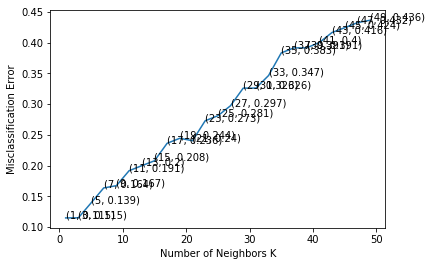

In [16]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
for xy in zip(neighbors, np.round(MSE, 3)):
    plt.annotate(s=xy, xy=xy)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [17]:
print("the misclassification error for each k value is : ", np.round(MSE, 3))

the misclassification error for each k value is :  [0.115 0.115 0.139 0.164 0.167 0.191 0.2   0.208 0.236 0.244 0.24  0.273
 0.281 0.297 0.326 0.326 0.347 0.383 0.391 0.391 0.4   0.416 0.424 0.432
 0.436]


In [20]:
# KNN with k = optimal_k
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_tr, y_tr)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print("The accuracy for KNN classifier for k = {} is {}%".format(optimal_k, acc))

The accuracy for KNN classifier for k = 1 is 89.33333333333333%
